# Practical Statistics for Data Science - Lab 3

#### Necessary libraries

In [1]:
import numpy  as np
import pandas as pd
import numba  as nb
import matplotlib.pyplot as plt

from scipy.stats import bernoulli, norm, chi2, t, pareto

#### Files cleaning

In [2]:
def clean_sample_data(file_name):

    with open(file_name, 'r') as old_file:
        data = old_file.read()
        for char in ['\n', '[', ']', 'X', 'Y', '=']:
            data = data.replace(char, '')

    with open(file_name, 'w') as new_file:
        new_file.write(data)

In [3]:
for idx in range(1, 6):
    clean_sample_data(f'sample{idx}.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'sample1.txt'

In [4]:
split_index_4 = 100
split_index_5 = 200

## Task 1

In [5]:
i_range_1 = np.arange(1, 14)

In [6]:
sample_size_1 = 10**4
p_1 = 1/3

In [7]:
def generate_distributions(i):

    num_trials  = 2**i
    sample = np.array([bernoulli.rvs(p=p_1, size=num_trials).sum() for _ in range(sample_size_1)]).reshape(1,-1)
    sample_std = sample.std()

    distribution_1 = (sample - num_trials/3) / sample_std
    distribution_2 = (sample - num_trials/3) / (np.sqrt(sample_size_1) * sample_std)
    distribution_3 = sample / sample_size_1

    all_distributions = np.concatenate((distribution_1, distribution_2, distribution_3))

    return all_distributions


In [8]:
alpha_list_1 = [0.5, 0.7, 1]

def plot_distributions(i):

    dist_array = generate_distributions(i)

    plt.figure(figsize=(12,5))

    plt.suptitle(f'Comparison of different distributions for $i={i}$', fontsize=16)

    for idx in range(3):

        dist = dist_array[idx,:]
        bin_width = (dist.max() - dist.min()) / (i*3)

        plt.subplot(1, 3, idx+1)

        plt.hist(dist, color='darkblue', alpha=alpha_list_1[idx],
                 bins=np.arange(dist.min(), dist.max() + bin_width, bin_width), density=True)

        if idx == 0:
            x_norm = np.linspace(-5, 5, 100)
            plt.plot(x_norm, norm.pdf(x=x_norm, loc=0, scale=1), color='red', label='N(0,1)')
            plt.xlim(-4, 4)
            plt.ylabel('PDF / approximation', fontsize=14)
            plt.legend()

        plt.xlabel('x', fontsize=14)

    plt.show()

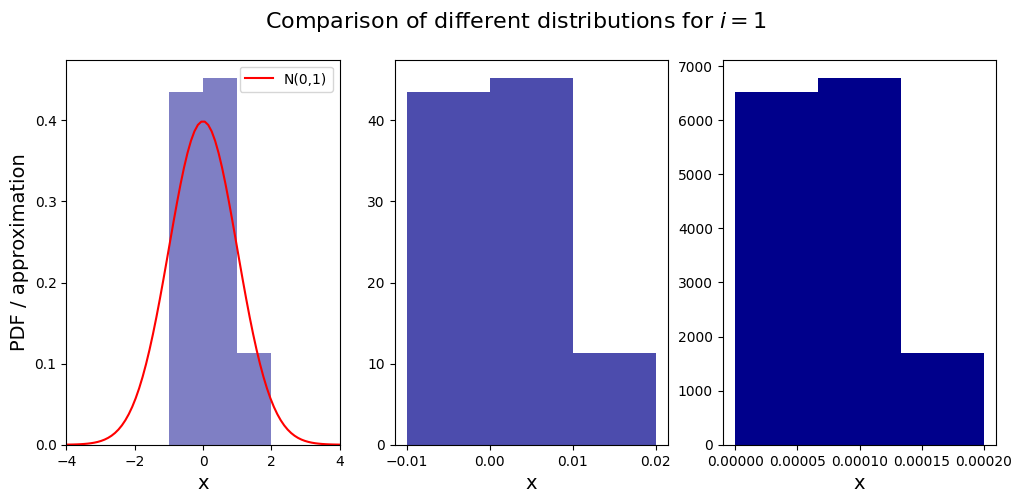

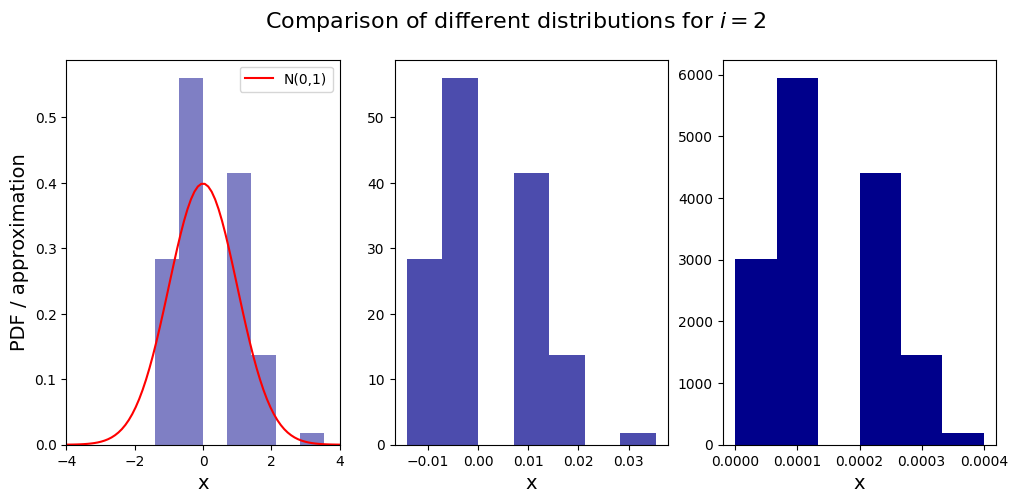

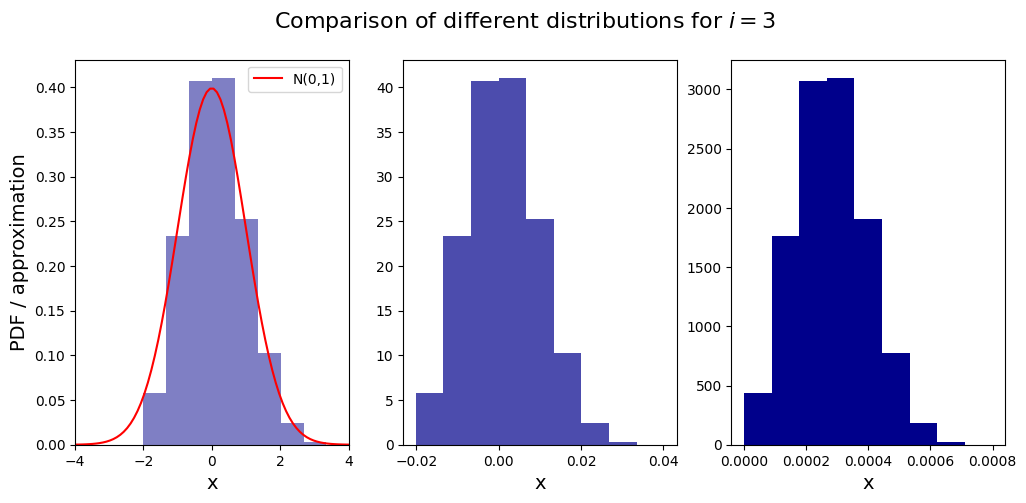

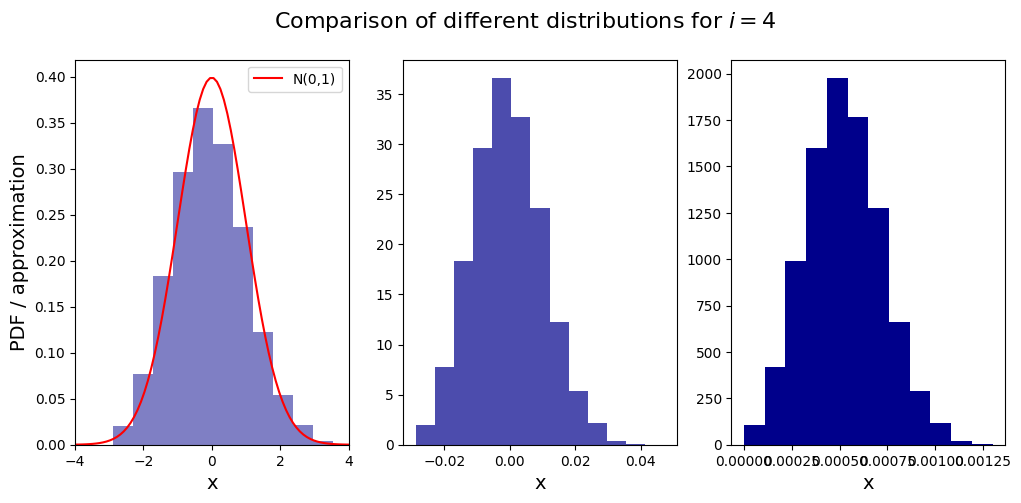

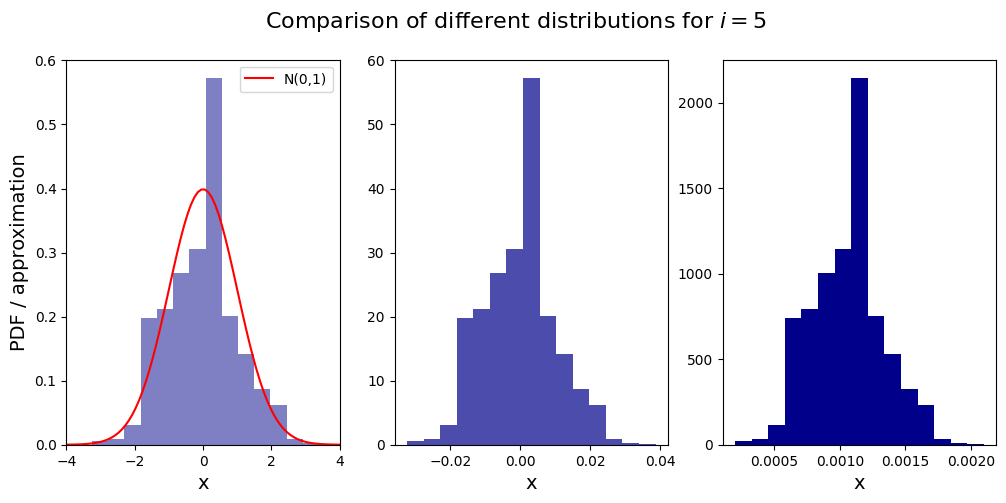

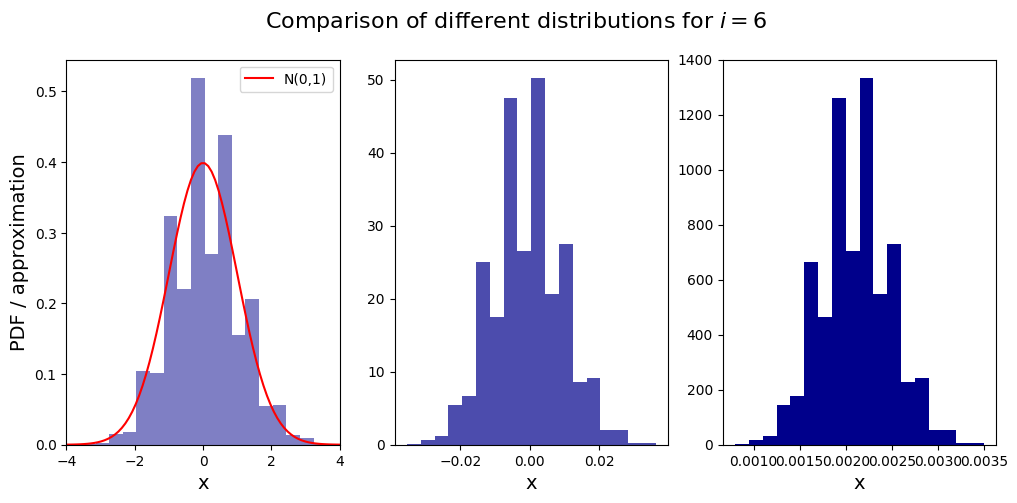

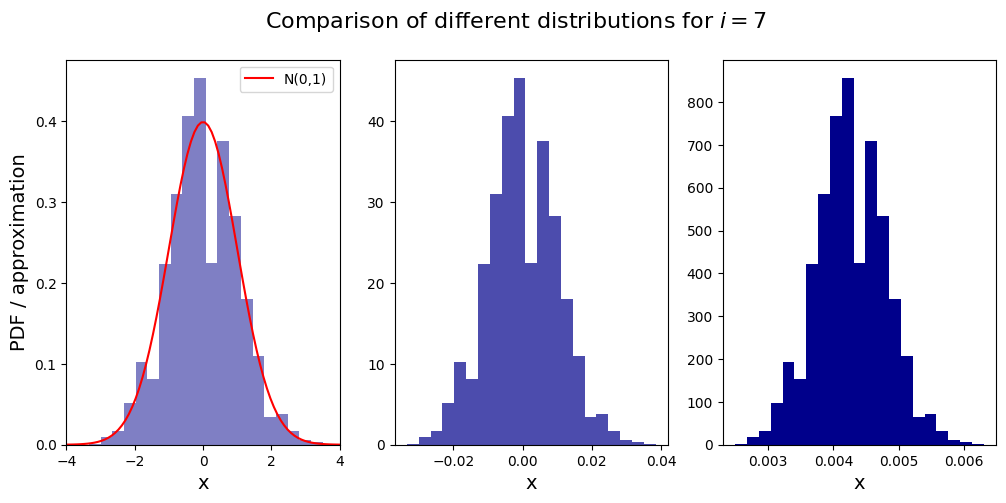

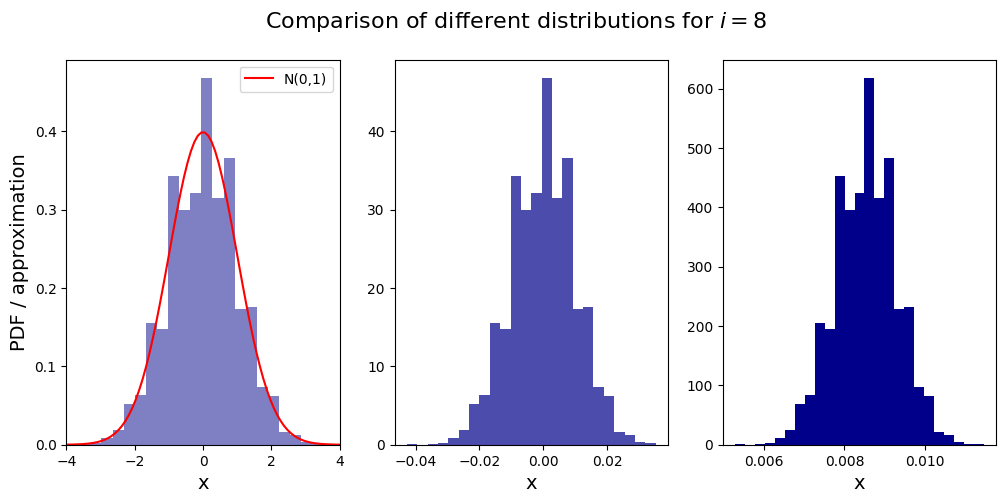

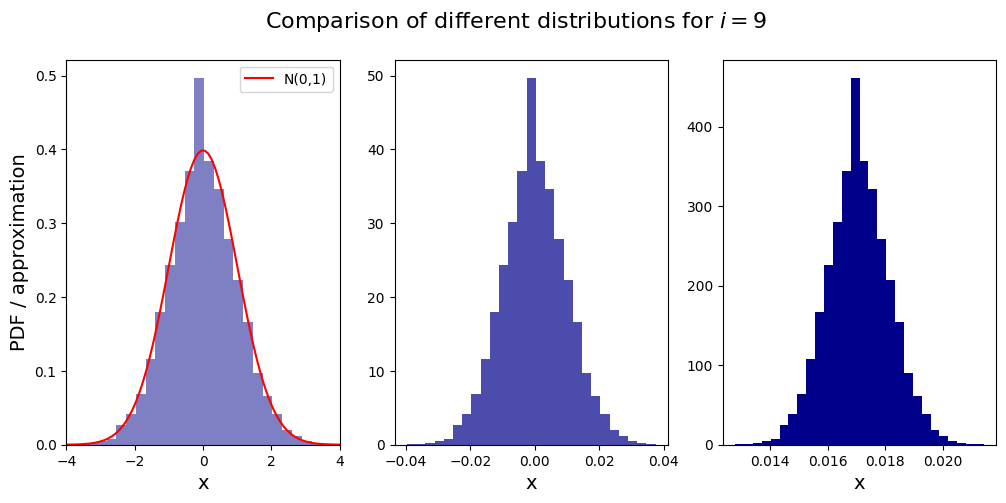

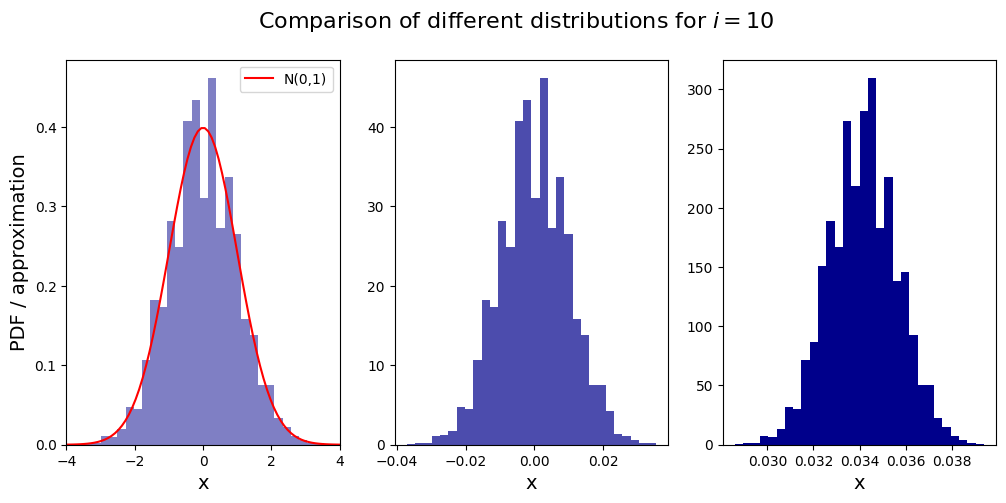

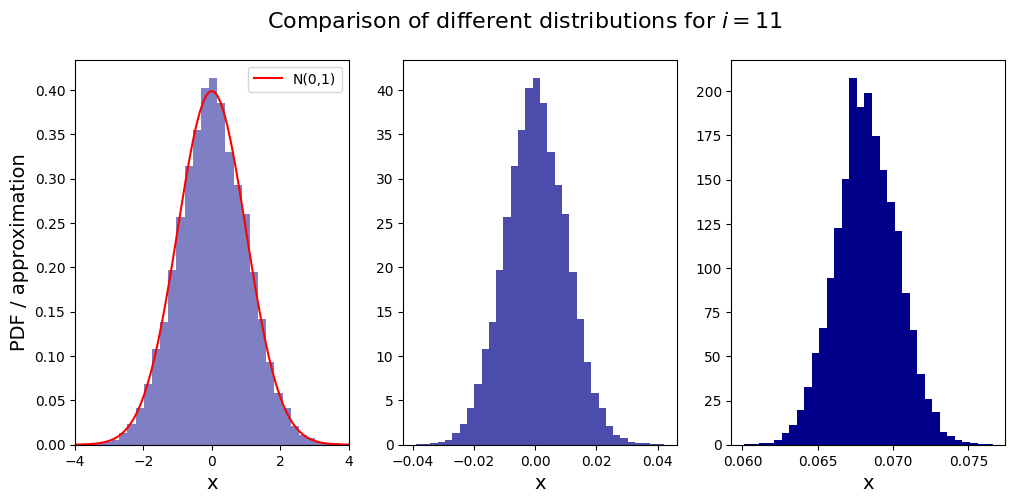

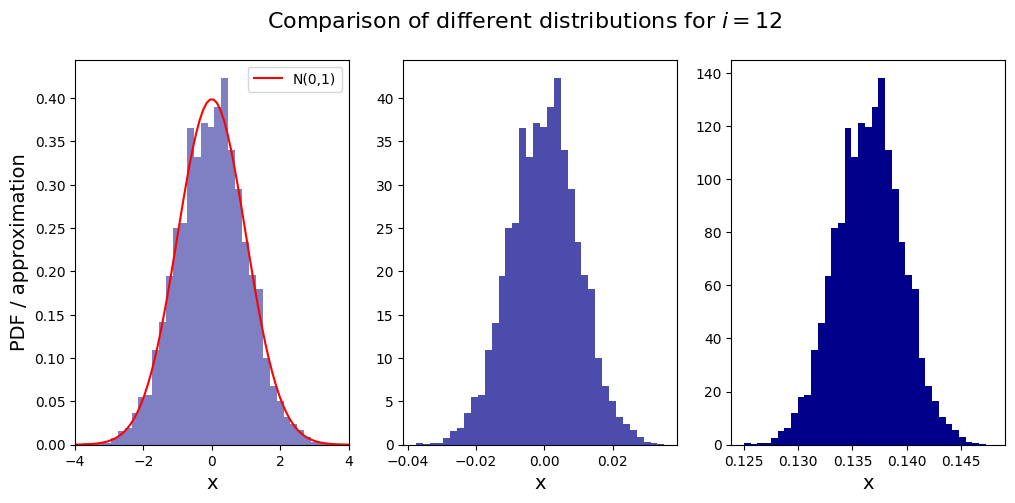

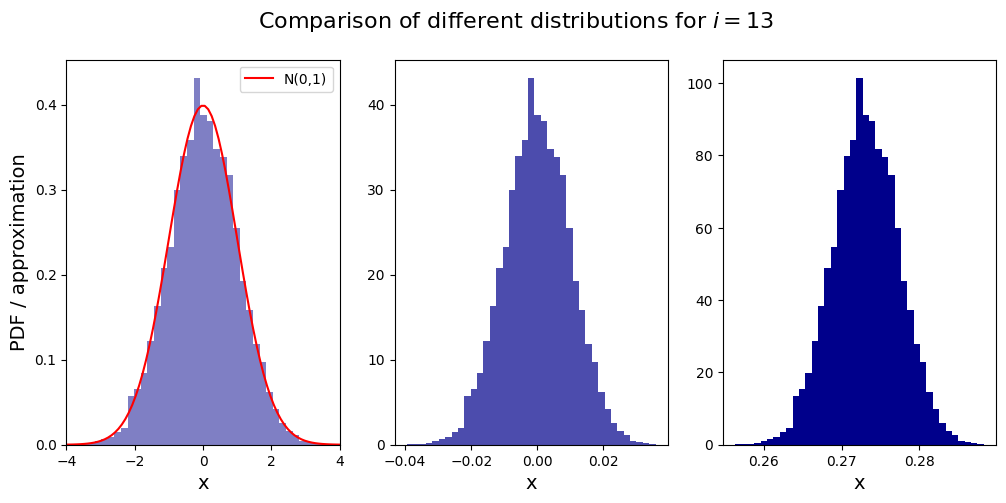

In [ ]:
for i in i_range_1:
    plot_distributions(i)

## Task 2

In [ ]:
df_list = [1, 2, 10, 50, 100]
colors_list = ['teal', 'coral', 'forestgreen', 'orange', 'royalblue']

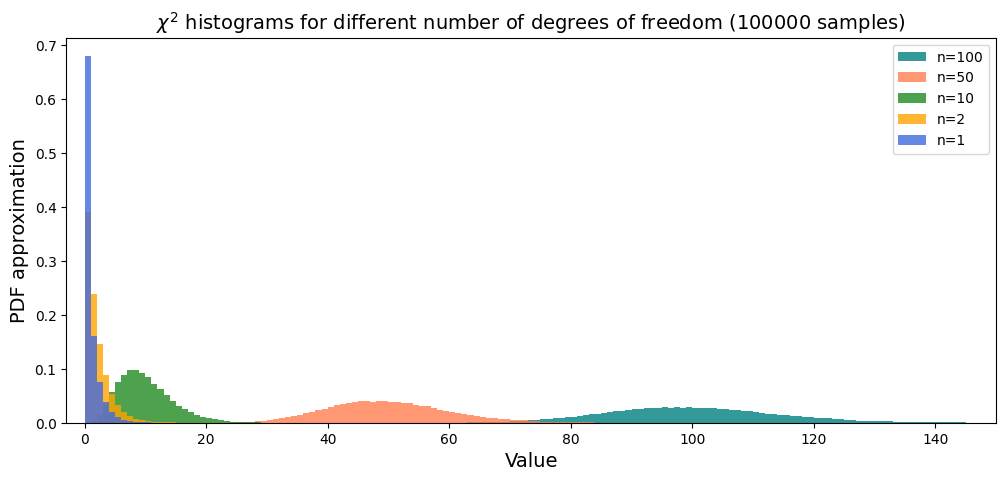

In [ ]:
plt.figure(figsize=(12,5))

for idx in range(4, -1, -1):

    X = chi2.rvs(df=df_list[idx], size=100000)

    plt.hist(X, bins=np.arange(0, X.max()+1, 1), alpha=0.8, label=f'n={df_list[idx]}',
             color=colors_list[4-idx], density=True)

plt.xlim(-3, 150)
plt.title(r'$\chi^2$ histograms for different number of degrees of freedom (100000 samples)', fontsize=14)
plt.xlabel('Value', fontsize=14)
plt.ylabel('PDF approximation', fontsize=14)
plt.legend()


plt.show()

## Task 3

In [ ]:
df_list_3    = [1, 2, 3, 5, 10]
x_range_3    = np.arange(-5, 5, 0.01)
color_list_3 = ['royalblue', 'forestgreen', 'olivedrab', 'goldenrod', 'coral']

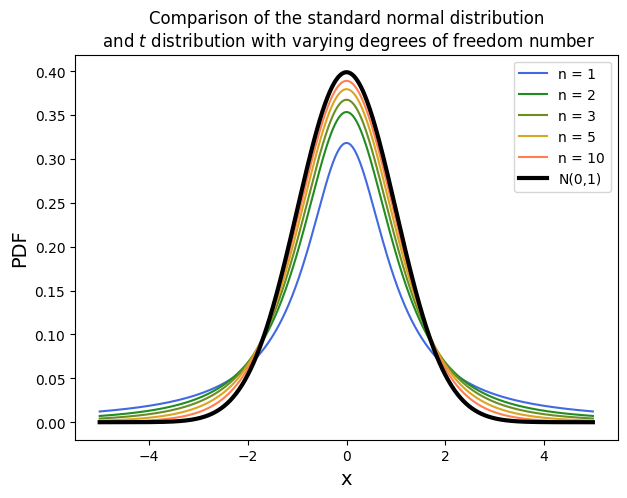

In [ ]:
plt.figure(figsize=(7,5))

for idx in range(5):
    plt.plot(x_range_3, t.pdf(x=x_range_3, df=df_list_3[idx]), label=f'n = {df_list_3[idx]}', color=color_list_3[idx])

plt.plot(x_range_3, norm.pdf(x=x_range_3), linewidth=3, color='k', label='N(0,1)')

plt.title('Comparison of the standard normal distribution\n and $t$ distribution with varying degrees of freedom number')
plt.xlabel('x', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.legend()

plt.show()

## Task 4

In [ ]:
df_list_4 = [1, 2, 10, 50, 100]

In [ ]:
my_variances_4 = [np.var(t.rvs(df=df, size=1000)) for df in df_list_4]
my_variances_4 = np.array(my_variances_4).reshape(1,-1)

In [ ]:
true_variances_4 = np.array([np.NaN, np.inf] + [df/(df-2) for df in df_list_4[2:]])
true_variances_4 = np.array(true_variances_4).reshape(1,-1)

In [ ]:
frame_4 = pd.DataFrame(index=df_list_4,
                       columns=['Sample variance', 'Wikipedia variance'],
                       data=np.concatenate((my_variances_4, true_variances_4)).T)
frame_4

,Sample variance,Wikipedia variance
1,12790.108846,NaN
2,10.345572,inf
10,1.190440,1.250000
50,1.122923,1.041667
100,1.023885,1.020408


## Task 5

In [ ]:
n_5 = 10**5
m_5 = 5

x_range_5 = np.arange(-5, 5, 0.01)

In [ ]:
def value_5(n_5):
    sample = norm.rvs(loc=m_5, size=n_5)
    x_bar  = sample.mean()
    S      = sample.std()
    return np.sqrt(n_5) * (x_bar - m_5) / S

In [ ]:
X_5 = np.array([value_5(n_5) for _ in range(10**4)])

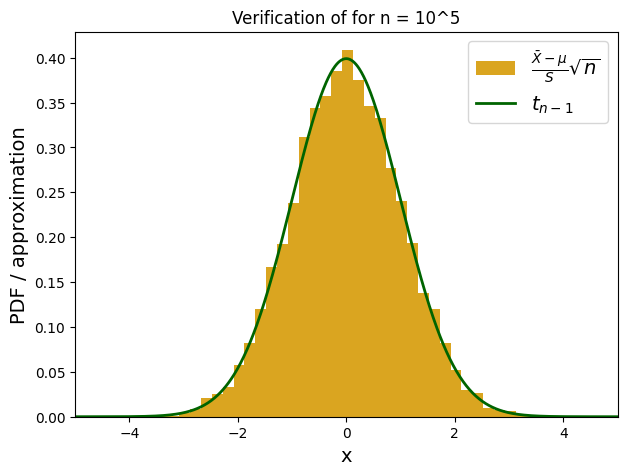

In [ ]:
plt.figure(figsize=(7,5))

plt.hist(X_5, bins=np.arange(X_5.min(), X_5.max()+0.2, 0.2), density=True, color='goldenrod',
         label=r'$\frac{\bar{X}-\mu}{S}\sqrt{n}$')
plt.plot(x_range_5, t.pdf(x=x_range_3, df=n_5-1), color='darkgreen', linewidth=2, label='$t_{n-1}$')

plt.title('Verification of for n = 10^5')
plt.xlabel('x', fontsize=14)
plt.ylabel('PDF / approximation', fontsize=14)
plt.xlim(-5, 5)
plt.legend(fontsize=14)

plt.show()

## Task 6

In [ ]:
P_6 = lambda a: pareto.rvs(b=a, size=100).sum()

In [ ]:
X_6_1 = np.array([P_6(1) for _ in range(1000)])
X_6_2 = np.array([P_6(1.5) for _ in range(1000)])

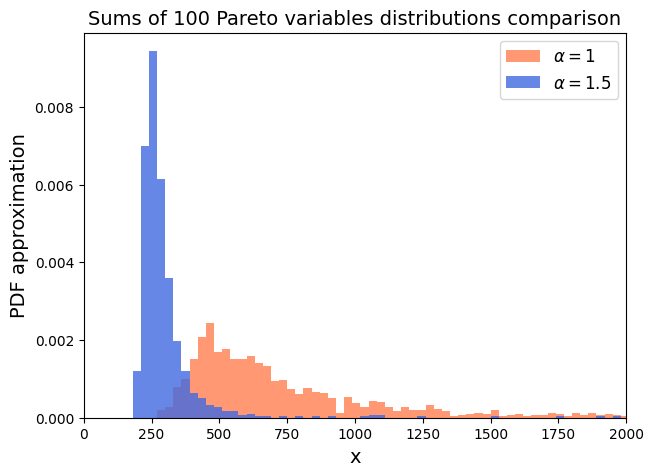

In [ ]:
plt.figure(figsize=(7,5))

plt.hist(X_6_1, bins=np.arange(0, X_6_1.max()+30, 30), density=True, color='coral', label=r'$\alpha=1$', alpha=0.8)
plt.hist(X_6_2, bins=np.arange(0, X_6_2.max()+30, 30), density=True, color='royalblue', label=r'$\alpha=1.5$', alpha=0.8)

plt.xlim(0, 2000)
plt.title('Sums of 100 Pareto variables distributions comparison', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('PDF approximation', fontsize=14)
plt.legend(fontsize=12)

plt.show()

## Task 7

In [ ]:
s_list_7 = np.arange(1, 5001 ,100)

In [ ]:
P_7 = lambda a,s: pareto.rvs(b=a, size=s).mean()

In [ ]:
X_7_1 = [P_7(1, s) for s in s_list_7]
X_7_10 = [P_7(10, s) for s in s_list_7]

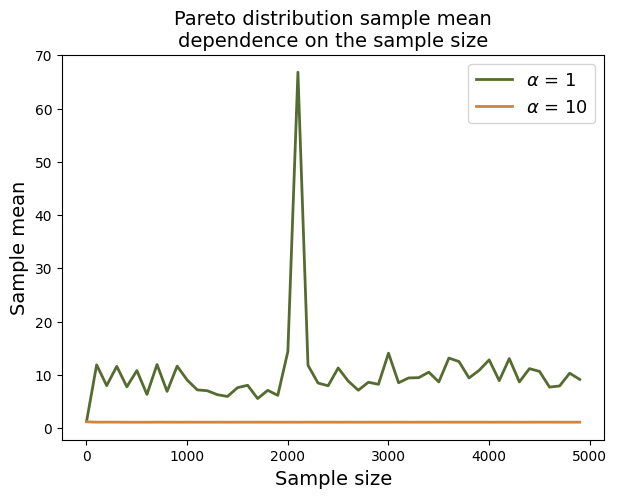

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(s_list_7, X_7_1, linewidth=2, color='darkolivegreen', label=r'$\alpha$ = 1')
plt.plot(s_list_7, X_7_10, linewidth=2, color='peru', label=r'$\alpha$ = 10')

plt.legend(fontsize=13)
plt.title('Pareto distribution sample mean\ndependence on the sample size', fontsize=14)
plt.xlabel('Sample size', fontsize=14)
plt.ylabel('Sample mean', fontsize=14)

plt.show()

## Task 8

In [ ]:
data_8 = np.loadtxt('sample1.txt')

In [ ]:
p_estimator = data_8.mean()
p_estimator

0.238

## Task 9

In [ ]:
data_9 = np.loadtxt('sample2.txt')

In [ ]:
m_9 = data_9.mean()
s_9 = data_9.std()

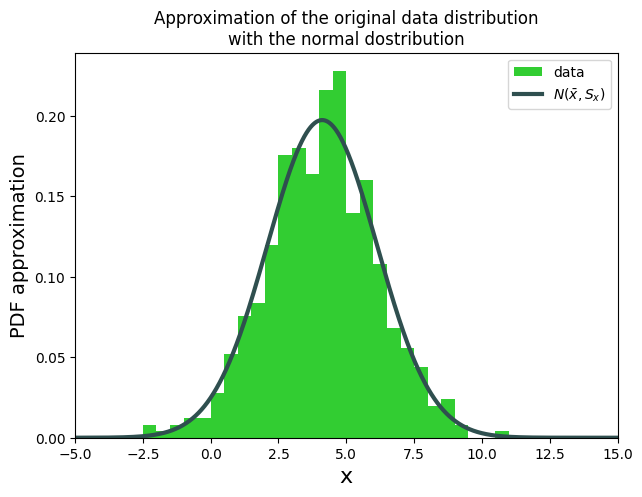

In [ ]:
x_range_9 = np.arange(m_9-10, m_9+11, 0.01)

plt.figure(figsize=(7,5))

plt.hist(data_9, density=True, bins=np.arange(-5, 15.5, 0.5), color='limegreen', label='data')
plt.plot(x_range_9, norm.pdf(x=x_range_9, loc=m_9, scale=s_9), linewidth=3, color='darkslategray', label=r'$N(\bar{x},S_{x})$')

plt.title('Approximation of the original data distribution\nwith the normal dostribution')
plt.xlabel('x', fontsize=16)
plt.ylabel('PDF approximation', fontsize=14)
plt.xlim(-5, 15)
plt.legend()

plt.show()

## Task 10

In [ ]:
data_10 = np.loadtxt('sample3.txt')

In [ ]:
m_10 = data_10.mean()
n_10 = data_10.size
s_10 = 1

In [ ]:
z_10 = norm.ppf(0.9995)

In [ ]:
I_L_10 = m_10 - z_10 * s_10 / np.sqrt(n_10)
I_U_10 = m_10 + z_10 * s_10 / np.sqrt(n_10)

Lower bound

In [ ]:
I_L_10

-1.093755998458978

Upper bound

In [ ]:
I_U_10

-0.8856448149953021

## Task 11

In [ ]:
data_11 = np.loadtxt('sample3.txt')

In [ ]:
m_11 = data_11.mean()
n_11 = data_11.size
s_11 = 1

In [ ]:
z_11 = norm.ppf(0.001)

In [ ]:
I_L_11 = m_11 + z_11 * s_11 / np.sqrt(n_11)

In [ ]:
I_L_11

-1.087422132592391

## Task 12

In [ ]:
data_12 = np.loadtxt('sample3.txt')

In [ ]:
m_12 = data_12.mean()
n_12 = data_12.size
s_12 = 1

- $p = 0.99$

In [ ]:
z_12_1 = norm.ppf(0.95)

In [ ]:
I_L_12_1 = m_12 - z_12_1 * s_12 / np.sqrt(n_12)
I_U_12_1 = m_12 + z_12_1 * s_12 / np.sqrt(n_12)

Lower bound

In [ ]:
I_L_12_1

-1.0417152455146956

Upper bound

In [ ]:
I_U_12_1

-0.9376855679395842

- $p=0.999999$

In [ ]:
z_12_2 = norm.ppf(1-5e-7)

In [ ]:
I_L_12_2 = m_12 - z_12_2 * s_12 / np.sqrt(n_12)
I_U_12_2 = m_12 + z_12_2 * s_12 / np.sqrt(n_12)

Lower bound

In [ ]:
I_L_12_2

-1.1443875974608695

Upper bound

In [ ]:
I_U_12_2

-0.8350132159934105

## Task 13

In [ ]:
data_13 = np.loadtxt('sample3.txt')

In [ ]:
m_13 = data_13.mean()
n_13 = data_13.size
s_13 = 1

In [ ]:
alpha_list_13 = [0.25, 0.1, 0.05, 0.01, 0.001, 0.00001]
I_L_list_13   = []

In [ ]:
for alpha in alpha_list_13:
    z = norm.ppf(alpha)
    I_L = m_13 + z * s_13 / np.sqrt(n_13)
    I_L_list_13.append(I_L)

In [ ]:
frame_13 = pd.DataFrame(columns=[r'$\mu_{0}$'], index=pd.MultiIndex.from_product([[r'$\alpha$'],alpha_list_13]), data=I_L_list_13)
frame_13

$\mu_{0}$
$\alpha$ 0.25000  -1.011030
         0.10000  -1.030227
         0.05000  -1.041715
         0.01000  -1.063266
         0.00100  -1.087422
         0.00001  -1.124568

## Task 14

In [ ]:
X_14 = np.loadtxt('sample4.txt')[:split_index_4]
Y_14 = np.loadtxt('sample4.txt')[split_index_4:]

In [ ]:
S_X_14 = 1
S_Y_14 = 2

In [ ]:
n_X_14 = X_14.size
n_Y_14 = Y_14.size

In [ ]:
d_14 = X_14.mean() - Y_14.mean()
d_14

-1.8582343518499993

In [ ]:
z_14 = norm.ppf(0.1)

In [ ]:
I_L_14 = d_14 + z_14 * np.sqrt((S_X_14**2 / n_X_14) + (S_Y_14**2 / n_Y_14))

In [ ]:
I_L_14

-2.1721490933149217

## Task 15

In [ ]:
X_15 = np.loadtxt('sample5.txt')[:split_index_5]
Y_15 = np.loadtxt('sample5.txt')[split_index_5:]

In [ ]:
n_X_15 = X_15.size
n_Y_15 = Y_15.size

In [ ]:
S_X_15 = X_15.std()
S_Y_15 = Y_15.std()

In [ ]:
d_15 = X_15.mean() - Y_15.mean()
d_15

-11.269288290143

In [ ]:
z_15 = t.ppf(0.1, df=np.sqrt(n_X_15**2 + n_Y_15**2))

In [ ]:
I_L_15 = d_15 + z_15 * np.sqrt((S_X_15**2 / n_X_15) + (S_Y_15**2 / n_Y_15))

In [ ]:
I_L_15

-13.618723871325894